# CNN - Covolutional Neural Network

### Import Required Packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical

### Importing the Data

In [3]:
### Load in the sample data
mnist = tf.keras.datasets.mnist

# Train Test Split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Explore the Data

In [4]:
# Specify the number of possible classes for the multiclass classification
class_count = 10

# Reshape the data converting the pixel range from 0 to 1
x_train = x_train.reshape(-1,28,28,1) / 255
x_test = x_test.reshape(-1,28,28,1) / 255
print(x_train.shape)
print(x_test.shape)

# One Hot Encoding of target variables
y_train = to_categorical(y_train, num_classes = class_count)
y_test = to_categorical(y_test, num_classes = class_count)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


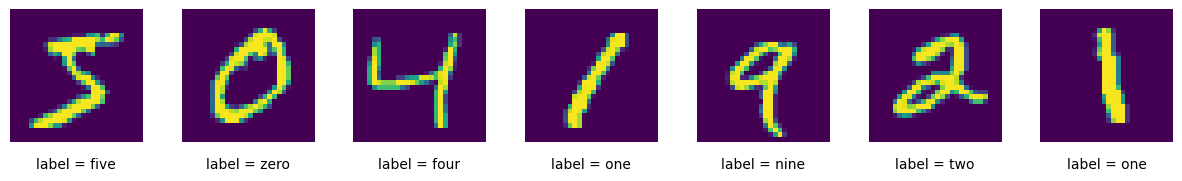

In [5]:
# Display the tensors as an image

# List of the possible classifications
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

image_count = 7
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)


for i in range(0,image_count):
    img = x_train[i]
    ax = fig.add_subplot(1, image_count, i+1)
    ax.axis("off")
    ax.text(0.5, -0.2, 'label = ' + str(numbers[np.argmax(y_train[i])]), 
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

### Building the Convolutional Neural Network

In [6]:
# Input Layer
input_img = Input(shape = (28,28,1))

# First Convolutional Layer
x = Conv2D(4, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)

# Second Convolutional Layer
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)

# Flattening layer
x = Flatten()(x)

# First Layer of feed forward NN after flattening
x = Dense(100, activation='relu')(x)

# Second Layer of feed forward NN
x = Dense(50, activation='relu')(x)

# Output Layer (softmax activation - for multiclass classification)
output_layer = Dense(class_count, activation = 'softmax')(x)

# Specify model by combining the input and output layer
model = Model(input_img,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        592       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0     

In [7]:
# Specify the optimizer, learning rate, loss function, and metric
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
# Fit the model
model.fit(x_train, y_train, batch_size=30, epochs=15, shuffle = True)

Epoch 1/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.2904 - accuracy: 0.9127
Epoch 2/15
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0908 - accuracy: 0.9732
Epoch 3/15
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 4/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 5/15
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0406 - accuracy: 0.9878
Epoch 6/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0331 - accuracy: 0.9893
Epoch 7/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0274 - accuracy: 0.9909
Epoch 8/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 9/15
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 10/15
2000/2000 [==============================] - 12s 6ms/step - l

In [9]:
# Make Predictions of the test dataset
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


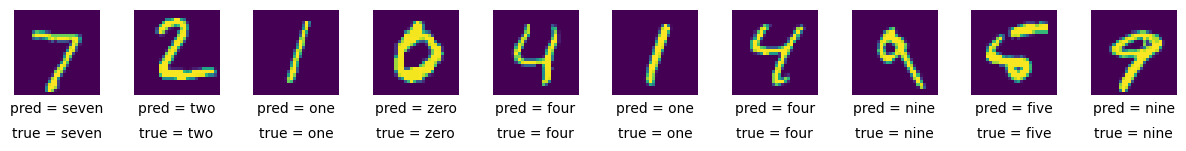

In [10]:
# Display Predictions
# Number of examples to show
example_count = 10

# Select random examples from the test dataset
examples = np.random.choice(a = range(len(x_test)), size = example_count)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i in range(0,example_count):
    # Isolate the example
    img = x_test[i]
    
    # Display the image
    ax = fig.add_subplot(1, example_count, i+1)
    ax.axis("off")
    
    # Find the index associated with the highest probability predicted by the model
    ax.text(0.5, -0.2, 'pred = ' + str(numbers[np.argmax(predictions[i])]), fontsize=10, ha='center', transform=ax.transAxes)
    
    # Find the true label of the data from the y test dataset
    ax.text(0.5, -0.5, 'true = ' + str(numbers[np.argmax(y_test[i])]), fontsize=10, ha='center', transform=ax.transAxes)
    
    # Display the examples
    ax.imshow(img)